#**Endometriose: Previsão Baseada em Sintomas**

A endometriose é uma condição em que o tecido semelhante ao revestimento do útero cresce em outras partes do corpo, causando dores intensas, inflamações e, em alguns casos, dificuldades para engravidar.

## Contexto da escolha do projeto

Após acompanhar a batalha dos efeitos desta condição em uma pessoa muito importante da minha família, decidi por meio deste conjunto de dados, compreender como os sintomas da Endometriose estão relacionados com o diagnóstico da doença.

## Afinal o que é a Endometriose ?

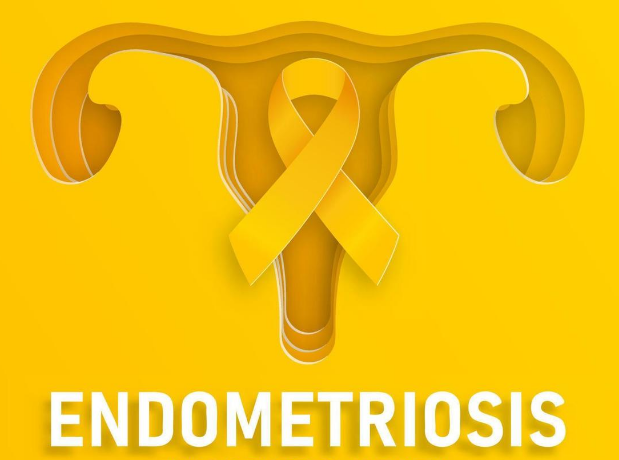

A endometriose (endometriosis) é uma condição embriológica, como uma "mancha" de nascença de endométrio, que é a camada interna do útero, fora do útero, principamente em meio ao colágeno ou tecido conjuntivo da pelve. Cada vez que a mulher menstruar, ela terá um hematoma na endometriose. Isso determina uma reação imunológica local e sistêmica muito forte. Ao longo do tempo da sua vida reprodutiva a endometriose vai sendo transformada em fibrose, que leve a retração dos nervos da pelve consequente cronificação da dor. Ela também a principal causa de infertilidade nas mulheres. Desenvovimento do estudo de genética e embriologia tem desvendado origem da endometriose.

Descrita pelo **Dr. Igor Chiminácio** - Ginecologista, Especialista em endometriose

## Dados e Objetivo da Análise

- Conjunto de dados usado para análise:
[Endometriosis Dataset](https://www.kaggle.com/datasets/michaelanietie/endometriosis-dataset/code)

**Objetivo**
* Analisar como a variável Diagnóstico se relaciona com as variáveis dos sintomas.
* Construir um modelo que prevê quais são os sintomas mais significativos para o diagnóstico da endometiose.

**Observação**
- Estou ciente que tem modelos melhores para este caso, mas, como estou realizando estudos estatísticos, portanto, preferi utilizar o modelo presente.

## Descrição das variáveis do dataset

| Feature                    | Description                                                                    | Range/Values          |
|----------------------------|--------------------------------------------------------------------------------|-----------------------|
| Age                        | Age of the individual                                                          | 18–50 years           |
| Menstrual_Irregularity     | Indicates whether the individual experiences irregular menstruation            | 0 = No, 1 = Yes       |
| Chronic_Pain_Level         | Pain severity reported by the individual                                       | 0 to 10 (higher indicates more severe pain) |
| Hormone_Level_Abnormality | Indicates abnormalities in hormone levels                                      | 0 = Normal, 1 = Abnormal |
| Infertility                | Indicates if the individual experiences infertility                            | 0 = No, 1 = Yes       |
| BMI                        | Body Mass Index                                                                | 15 to 40              |
| Diagnosis                  | Target variable (0 = No endometriosis, 1 = Endometriosis present)             | 0 = No, 1 = Yes       |*texto em itálico*

## Bibliotecas

In [1]:
# Importando as bibliotecas que usaremos para executar o projeto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

# machine learning
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Conhecimento dos dados

In [2]:
# Importando os dados

patch = ('/content/structured_endometriosis_data.csv')

dados = pd.read_csv(patch)
dados.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [3]:
# Informações dos dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


In [4]:
# Verificando se há dados duplicados

print(f'A quantidade de dados duplicados existentes são: \n{dados.duplicated().sum()}')

A quantidade de dados duplicados existentes são: 
0


In [5]:
# Verificando se há dados nulos

print(f'A quantidade de dados nulos existentes é: \n{dados.isnull().sum()}')

A quantidade de dados nulos existentes é: 
Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64


In [6]:
dados.describe()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


## Análise Exploratória

### Qual é a relação entre Diagnóstico e os sintomas apresentados?



In [7]:
# Contagem de diagnósticos

diagnosis_counts = dados['Diagnosis'].value_counts()
print("Contagem de Diagnósticos:")
print(f"Sem endometiose: {diagnosis_counts[0]} mulheres")
print(f"Com endometriose: {diagnosis_counts[1]} mulheres")

Contagem de Diagnósticos:
Sem endometiose: 5921 mulheres
Com endometriose: 4079 mulheres


In [8]:
# Diagnóstico vs Menstruação Irregular

diagnosis_vs_irregular = pd.crosstab(dados['Diagnosis'], dados['Menstrual_Irregularity'])
diagnosis_vs_irregular

Menstrual_Irregularity,0,1
Diagnosis,,
0,2006,3915
1,1019,3060


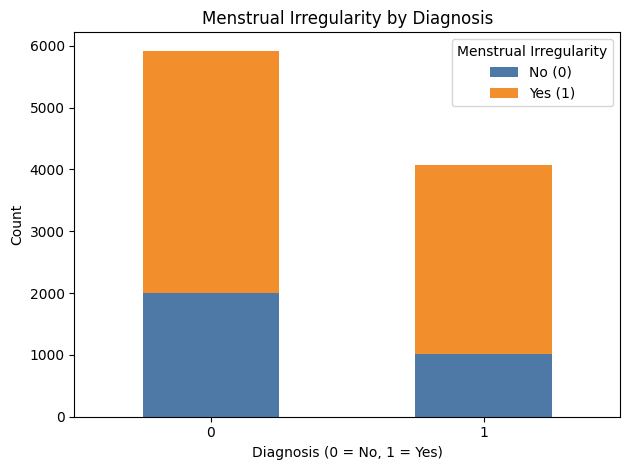

In [9]:
data = {
    "Diagnosis": [0]*2006 + [0]*3915 + [1]*1019 + [1]*3060,
    "Menstrual_Irregularity": [0]*2006 + [1]*3915 + [0]*1019 + [1]*3060
}
df = pd.DataFrame(data)

# Criar tabela de contingência
cross_tab = pd.crosstab(df["Diagnosis"], df["Menstrual_Irregularity"])

# Plotar gráfico de barras empilhadas
cross_tab.plot(kind="bar", stacked=True, color=["#4e79a7", "#f28e2b"])
plt.title("Menstrual Irregularity by Diagnosis")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Menstrual Irregularity", labels=["No (0)", "Yes (1)"], loc = 'upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

O gráfico mostra que mulheres com Diagnosis = 1 têm uma proporção maior de irregularidade menstrual (Menstrual_Irregularity = 1) em comparação com Diagnosis = 0. Isso sugere uma associação entre o diagnóstico de endometriose e a irregularidade menstrual.

In [10]:
# Diagnóstico vs Anormalidade do nível hormonal

diagnosis_vs_hormone = pd.crosstab(dados['Diagnosis'], dados['Hormone_Level_Abnormality'])
diagnosis_vs_hormone

Hormone_Level_Abnormality,0,1
Diagnosis,,
0,2873,3048
1,1216,2863


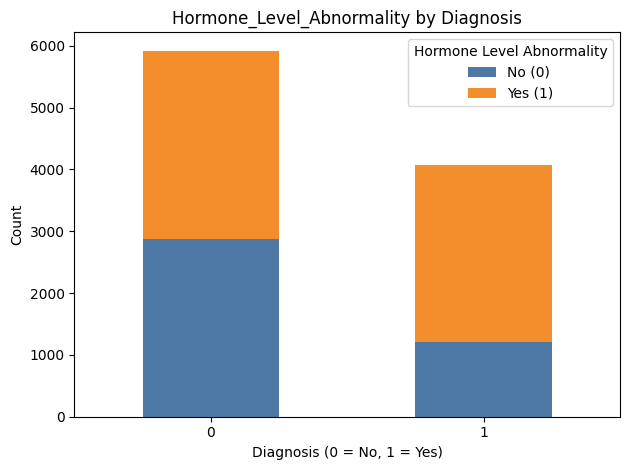

In [11]:
data = {
    "Diagnosis": [0]*2873 + [0]*3048 + [1]*1216 + [1]*2863,
    "Hormone_Level_Abnormality": [0]*2873 + [1]*3048 + [0]*1216 + [1]*2863
}
df = pd.DataFrame(data)

# Criar tabela de contingência
cross_tab = pd.crosstab(df["Diagnosis"], df["Hormone_Level_Abnormality"])

# Plotar gráfico de barras empilhadas
cross_tab.plot(kind="bar", stacked=True, color=["#4e79a7", "#f28e2b"])
plt.title("Hormone_Level_Abnormality by Diagnosis")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Hormone Level Abnormality", labels=["No (0)", "Yes (1)"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Visualizando a média e mediana para conseguirmos saber o valor dessa "aproximação"

media_hormo_irreg = dados.groupby(['Diagnosis'])['Hormone_Level_Abnormality'].agg(['mean', 'median'])
media_hormo_irreg

,mean,median
Diagnosis,,
0,0.514778,1.0
1,0.701888,1.0


Mulheres diagnosticadas (Diagnosis = 1) têm maior probabilidade de apresentar anormalidades hormonais do que aquelas não diagnosticadas.

In [13]:
# Diagnóstico vs Infertilidade

diagnosis_vs_infertility = pd.crosstab(dados['Diagnosis'], dados['Infertility'])
diagnosis_vs_infertility

Infertility,0,1
Diagnosis,,
0,4371,1550
1,2646,1433


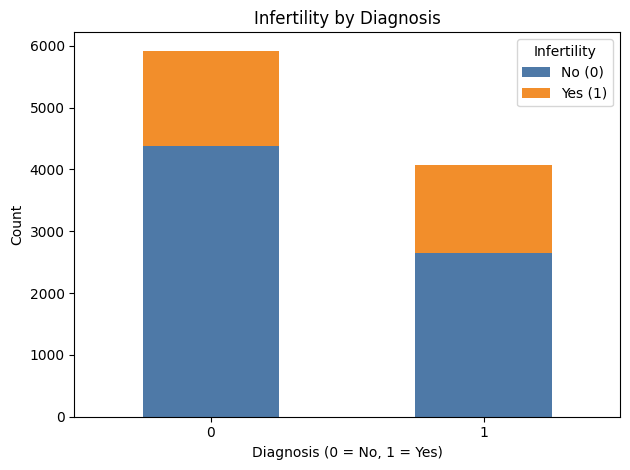

In [14]:
data = {
    "Diagnosis": [0]*4371 + [0]*1550 + [1]*2646 + [1]*1433,
    "Infertility": [0]*4371 + [1]*1550 + [0]*2646 + [1]*1433
}
df = pd.DataFrame(data)

# Criar tabela de contingência
cross_tab = pd.crosstab(df["Diagnosis"], df["Infertility"])

# Plotar gráfico de barras empilhadas
cross_tab.plot(kind="bar", stacked=True, color=["#4e79a7", "#f28e2b"])
plt.title("Infertility by Diagnosis")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Infertility", labels=["No (0)", "Yes (1)"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

A proporção de infertilidade (Infertility = 1) é maior entre as mulheres com Diagnosis = 1, ou seja, com o diagnóstico positivo sugerindo que a endometriose está associada a uma maior probabilidade de infertilidade.

<ipython-input-15-ad3acfa77d34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y="Chronic_Pain_Level", data=dados, palette=["#4e79a7", "#f28e2b"])


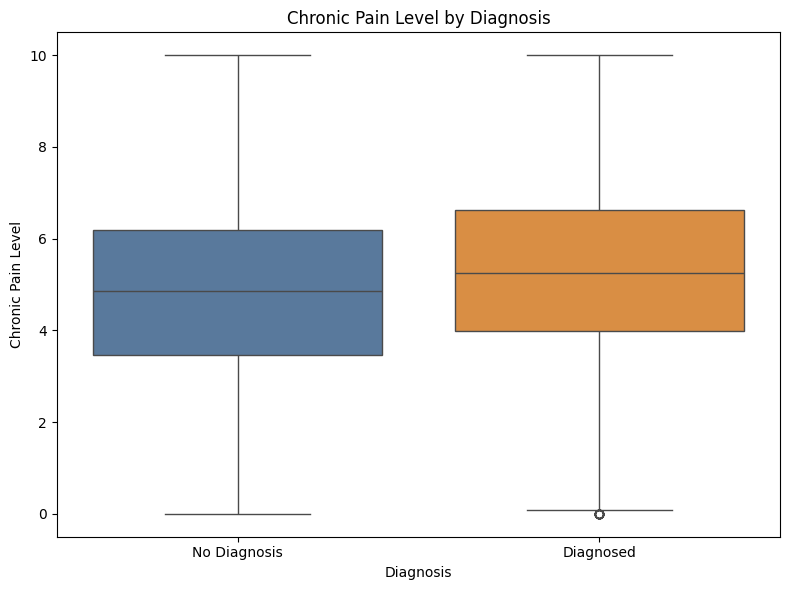

In [15]:
# Diagnóstico vs Nível de dor crônica

plt.figure(figsize=(8, 6))
sns.boxplot(x="Diagnosis", y="Chronic_Pain_Level", data=dados, palette=["#4e79a7", "#f28e2b"])
plt.title("Chronic Pain Level by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Chronic Pain Level")
plt.xticks([0, 1], ["No Diagnosis", "Diagnosed"])
plt.tight_layout()
plt.show()

O boxplot mostra que pacientes com Diagnosis = 1 têm uma mediana de Chronic_Pain_Level ligeiramente mais alta do que aqueles com Diagnosis = 0. No entanto, há uma sobreposição significativa nas distribuições, indicando que a dor crônica varia bastante em ambos os grupos.

<ipython-input-16-c0736ce4f50f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y="Age", data=dados, palette=["#4e79a7", "#f28e2b"])


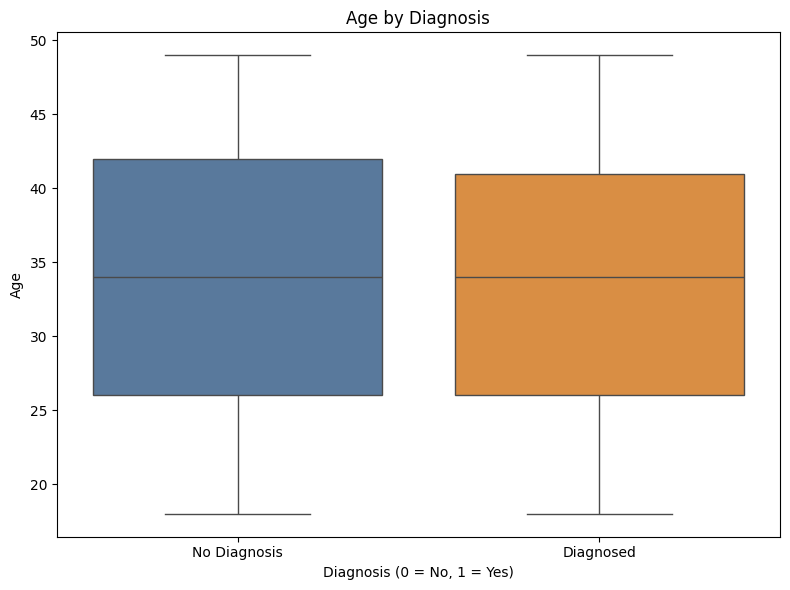

In [16]:
# Diagnóstico vs Idade

plt.figure(figsize=(8, 6))
sns.boxplot(x="Diagnosis", y="Age", data=dados, palette=["#4e79a7", "#f28e2b"])
plt.title("Age by Diagnosis")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.xticks([0, 1], ["No Diagnosis", "Diagnosed"])
plt.tight_layout()
plt.show()

In [17]:
# Visualizando a média e mediana para conseguirmos saber o valor dessa "aproximação" das medianas do boxplot

media_dignosis_age = dados.groupby(['Diagnosis'])['Age'].agg(['mean', 'median'])
media_dignosis_age

,mean,median
Diagnosis,,
0,33.780611,34.0
1,33.564109,34.0


A distribuição de idade é bastante semelhante entre os grupos Diagnosis = 0 e Diagnosis = 1. Isso sugere que a idade não é um fator determinante para o diagnóstico de endometriose neste dataset. No agrupamento, podemos ver nítidamente as médias.

<ipython-input-18-3439e3b532a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y="BMI", data=dados, palette=["#4e79a7", "#f28e2b"])


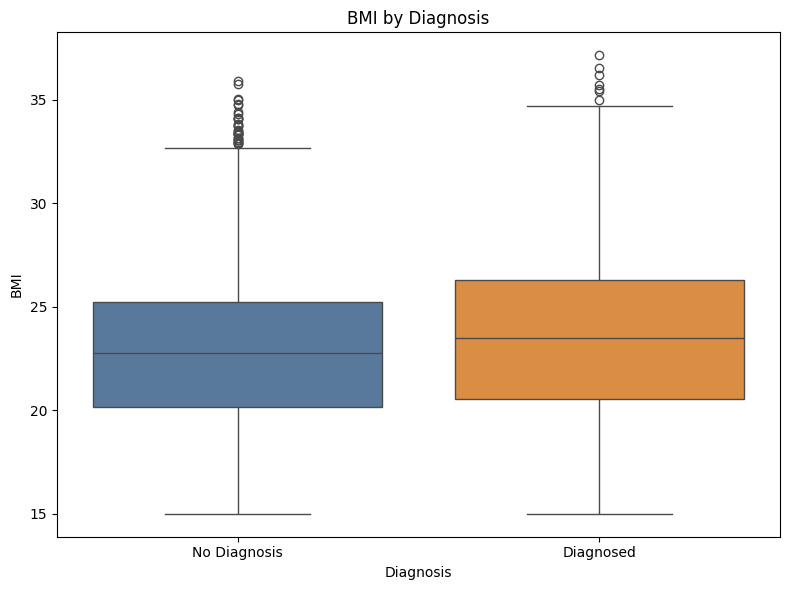

In [18]:
# Diagnóstico vs Índice de massa corporal

plt.figure(figsize=(8, 6))
sns.boxplot(x="Diagnosis", y="BMI", data=dados, palette=["#4e79a7", "#f28e2b"])
plt.title("BMI by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("BMI")
plt.xticks([0, 1], ["No Diagnosis", "Diagnosed"])
plt.tight_layout()
plt.show()

O boxplot indica que o IMC é muito semelhante entre os grupos Diagnosis = 0 e Diagnosis = 1, com medianas e intervalos interquartis quase idênticos. Isso sugere que o IMC não está fortemente relacionado ao diagnóstico de endometriose neste dataset e também notamos que temos um certo "grupo" de mulheres com sobrepeso para ambos os grupos.

**Observações:**

Pergunta feita:
"Qual é a relação entre Diagnóstico e os sintomas apresentados?"

- Nítidamente podemos observar que as mulheres que tem uma menstruação irregular, nível hormonal anormal, dor crônica e infertilidade tem importância significativa no diagnótico de Endometriose.
- Por mais que a população de mulheres neste conjunto de dados que tem endometriose é "minoria" em uma "boa" parte das que não tem, mais os sintomas como menstruação irregular, nível hormonal anormal, dor crônica se mostram muito fortes em torno do tamanho da população.
- Podemos concluir inicialmente que, as mulheres que tem endometriose, em suma, tem as suas dores mais intensas que se aproxima do conjunto de mulheres que não tem endometriose, isso nos reflete que a endometriose tem picos de sintomas elevadíssimos em suas portadoras.

## Testes de hipotese

Objetivo:

Comprovar se alguns sintomas são estistícamentes significativas com o diagnóstico

### As médias do nível de dor crônica das pacientes com e sem endometriose são significamente iguais?

In [19]:
# Para visualizar vamos agrupar a coluna "Chronic_Pain_Level" pelo valores da coluna "Diagnosis"
# 0 = sem endometriose
# 1 = com endometriose

media_dor_cronica = dados.groupby(['Diagnosis'])['Chronic_Pain_Level'].agg(['mean', 'median'])
media_dor_cronica

,mean,median
Diagnosis,,
0,4.837972,4.850343
1,5.310260,5.243006


De fato as variáveis tem uma certa aproximação, vamos realizar um Teste T para duas amostras independentes para descobrir se elas são significamente iguais

H0 >= As médias de dores são significamente iguais entre as mulheres com e sem endometriose

HA != As médias de dores são diferentes

Para compreensão:

Se p ≥ 0.05 → Não se rejeita H0: não há evidência estatística suficiente de que as médias são diferentes.

Se p < 0.05 → Rejeita-se a hipótese nula (H0): há evidência de que as médias são diferentes.

In [20]:
# importando a bliblioteca necessária
from scipy.stats import ttest_ind

# Grupos
group0 = dados[dados["Diagnosis"] == 0]["Chronic_Pain_Level"]
group1 = dados[dados["Diagnosis"] == 1]["Chronic_Pain_Level"]

# Teste t de Student com variâncias desiguais
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: -11.792, p-value: 0.000


Interpretação do resultado:

- p-value: 7.471865200988891e-32 (usei a formatação para ficar mais "clean" , enfim, o p-valor deu muito mas muito abaixo de 0.05, portanto HO é instantaneamente rejeitada e as médias são diferentes.)

### A proporção do nível anormal de hormônio das mulheres com e sem endometriose são significamente iguais?

De acordo com os meus estudos estatísticos e com a descrição das duas variáveis "Diagnosis" e "Hormone_Level_Abnormality" deste conjuntos de dados, irei usar o teste qui-quadrado (chi-squared test) que é um teste estatístico não paramétrico utilizado para avaliar se há associação entre duas variáveis categóricas.

H0 = As proporções de anormalidade hormonal são iguais entre os grupos com e sem endometriose

HA != As proporções de anormalidade hormonal são diferentes entre os grupos com e sem endometriose

In [21]:
# Criar a tabela de contingência entre "Diagnosis" e "Hormone_Level_Abnormality"
contingency_table = pd.crosstab(dados["Diagnosis"], dados["Hormone_Level_Abnormality"])

# Exibir a tabela de contingência
print("Tabela de Contingência:")
print(contingency_table)

Tabela de Contingência:
Hormone_Level_Abnormality     0     1
Diagnosis                            
0                          2873  3048
1                          1216  2863


In [22]:
# importando a bliblioteca necessária
from scipy.stats import chi2_contingency

# Realizar o teste qui-quadrado
chi2, pvalue, dof, expected = chi2_contingency(contingency_table)

# Resultados
print("Resultados do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2:.3f}")
print(f"P-valor (resultado real): {pvalue}")
print(f"P-valor (simplificado): {pvalue:.3f}")
print(f"Graus de Liberdade: {dof}")
print("\nValores Esperados:")
print(expected)


Resultados do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 349.062
P-valor (resultado real): 6.783623114950179e-78
P-valor (simplificado): 0.000
Graus de Liberdade: 1

Valores Esperados:
[[2421.0969 3499.9031]
 [1667.9031 2411.0969]]


In [23]:
# Para visualizar a proporção utilizando a média, vamos agrupar a coluna "Hormone_Level_Abnormality" pelo valores da coluna "Diagnosis"

media_hormo_irreg = dados.groupby(['Diagnosis'])['Hormone_Level_Abnormality'].agg(['mean', 'median'])*100
media_hormo_irreg

,mean,median
Diagnosis,,
0,51.477791,100.0
1,70.188772,100.0


Interpetração do resultado:

- p-value 6.783623114950179e-78 é muito menor que 0.05, ou seja, ssso indica que a proporção de mulheres com anormalidade hormonal é significativamente diferente entre os grupos com e sem endometriose
- O p-valor baixo indica que a probabilidade de observar essa associação por puro acaso é praticamente nula dado o valor extremamente baixo. Portanto, rejeitamos a H0 (de que as variáveis são independentes) e concluímos que a associação é "significativa", ou seja, sugere que a presença de endometriose está relacionada a uma maior chance de anormalidade hormonal, o que pode ser clinicamente relevante."
- A associação foi observada nesse contexto específico, com as proporções de anormalidade hormonal sendo diferentes entre os grupos (51.47% para sem endometriose vs. 70.18% para com endometriose), portanto, as mulheres com endometriose tem uma maior anormalidade no nível hormonal.

### A proporção da irregularidade menstrual das mulheres com e sem endometriose são significamente iguais?

Iremos também utilizar neste caso o teste chi-quadrado (chi-squared test) para responder esta pergunta.

H0 = As proporções de menstruação irregular são iguais entre os grupos com e sem endometriose

HA != As proporções de menstruação irregular são diferentes entre os grupos com e sem endometriose

In [24]:
# Criar a tabela de contingência entre "Diagnosis" e "Menstrual_Irregularity"
contingency_table = pd.crosstab(dados["Diagnosis"], dados["Menstrual_Irregularity"])

# Exibir a tabela de contingência
print("Tabela de Contingência:")
print(contingency_table)

Tabela de Contingência:
Menstrual_Irregularity     0     1
Diagnosis                         
0                       2006  3915
1                       1019  3060


In [25]:
# Realizar o teste qui-quadrado
chi2, pvalue, dof, expected = chi2_contingency(contingency_table)

# Resultados
print("Resultados do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2:.3f}")
print(f"P-valor (resultado real): {pvalue}")
print(f"P-valor (simplificado): {pvalue:.3f}")
print(f"Graus de Liberdade: {dof}")
print("\nValores Esperados:")
print(expected)

Resultados do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 90.203
P-valor (resultado real): 2.149337936523963e-21
P-valor (simplificado): 0.000
Graus de Liberdade: 1

Valores Esperados:
[[1791.1025 4129.8975]
 [1233.8975 2845.1025]]


In [26]:
# Visualização a proporção pela média

media_menstru_irreg = dados.groupby(['Diagnosis'])['Menstrual_Irregularity'].agg(['mean', 'median'])*100
media_menstru_irreg

,mean,median
Diagnosis,,
0,66.120588,100.0
1,75.018387,100.0


Interpetração do resultado:

- p-value 2.149337936523963e-21 é muito menor que 0.05, ou seja, isso indica que a proporção de mulheres com irregularidade menstrual é significativamente diferente entre os grupos com e sem endometriose
- O p-valor baixo indica que a probabilidade de observar essa associação por puro acaso é praticamente nula dado o valor extremamente baixo. Portanto, rejeitamos a H0 (de que as variáveis são independentes) e concluímos que a associação é "significativa", ou seja, sugere que a presença de endometriose está relacionada a uma maior chance de menstruação irregular, o que pode ser clinicamente relevante."
- A associação foi observada nesse contexto específico, com as proporções de menstruação irregular sendo diferentes entre os grupos (66.12% para sem endometriose vs. 75.01% para com endometriose), portanto, as mulheres com endometriose apresentam uma irregularização menstrual muito significativa.

## O Modelo

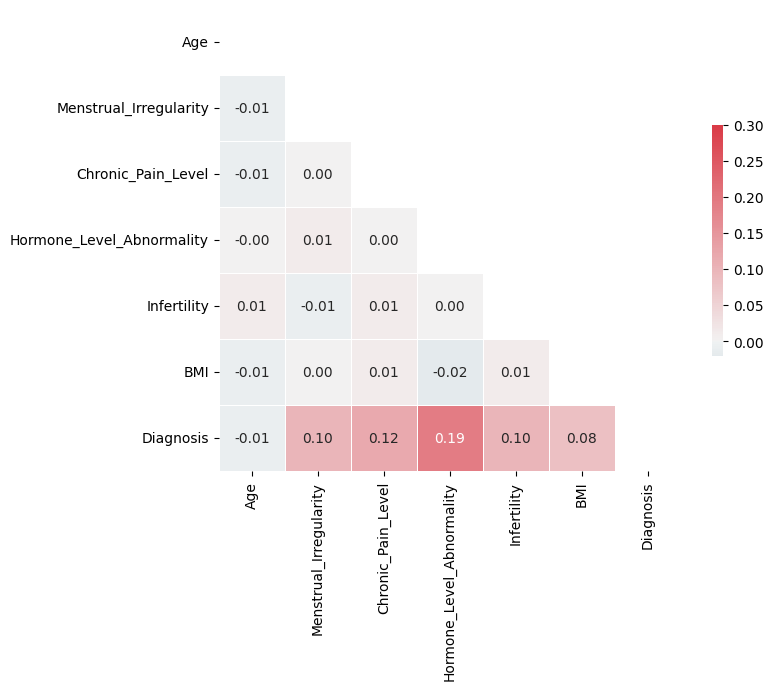

In [27]:
# Matriz para analisar a correlação entre as variáveis

corr = dados.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()

**Interpretação Geral:**

Diagnosis é a variável mais correlacionada com outras, especialmente com Hormone_Level_Abnormality (0.19), Chronic_Pain_Level (0.12), Menstrual_Irregularity (0.10) e Infertility (0.10). Isso indica que essas quatro variáveis (anormalidades hormonais, dor crônica, irregularidade menstrual e infertilidade) são os principais indicadores associados ao diagnóstico da condição analisada.

In [28]:
dados.columns

Index(['Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level',
       'Hormone_Level_Abnormality', 'Infertility', 'BMI', 'Diagnosis'],
      dtype='object')

In [29]:
# dividindo os dados para treino e teste

X = dados.drop(['Diagnosis'], axis=1)  # Variáveis independentes
y = dados['Diagnosis']  # Variável dependente (corrigido)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Criando a fórmula dinamicamente

cols = dados.columns.drop('Diagnosis')
formula = 'Diagnosis ~ ' + ' + '.join(cols)
print(formula)

Diagnosis ~ Age + Menstrual_Irregularity + Chronic_Pain_Level + Hormone_Level_Abnormality + Infertility + BMI


In [31]:
# Rodando o modelo e reportando os resultados

model = smf.glm(formula=formula, data=X_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Diagnosis   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4477.5
Date:                Wed, 28 May 2025   Deviance:                       8954.9
Time:                        23:41:26   Pearson chi2:                 6.98e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07154
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Observações importantes sobre o modelo:**

- Percebemos que o p-valor de quase todas as variáveis estão com valor 0.000, menor do que 0,05%, significando que tirando a variável "Age", todas as demais tem significância estatística para o poder preditivo do modelo.
- Vimos que o Pseudo R-squ. (CS): 0.07154 é um valor "baixo", entretanto, esse valor não tem tanta significância no poder de avaliação do modelo, pois, iremos analisar os resultados pela matriz de confusão.
- Para avaliarmos o poder do modelo, iremos usar uma matriz de correlação, pois, é a mais apropriada para este caso.

### Modelo completo

In [32]:
pred_model = logistic_fit.predict(X_test)
pred_model

# 0.5 => Diagnosis = 1 (endometriose) - portanto, 5% de chance de ter endometriose
# 0.5 < Diagnosis = 0 (sem endometriose) - portanto, 5% de chance de não ter endometriose

,0
6252,0.480924
4684,0.415539
1731,0.352200
4742,0.272750
4521,0.291418
...,...
8014,0.327828
1074,0.478139
3063,0.428642
6487,0.319607


In [33]:
# classificando o resultado acima com rótulos para ficar totalmente entendível o diagnótico da paciente.

pred_nominal = [ "Sem Endometriose" if x < 0.5 else "Com Endometriose" for x in pred_model]

# Contar as ocorrências
counts = Counter(pred_nominal)
print(counts)

Counter({'Sem Endometriose': 2213, 'Com Endometriose': 787})


Visualizando a distribuição percentual da predição do diagnóstico do modelo usando Seaborn (barplot)

<ipython-input-34-24777fcea300>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=div_palette)


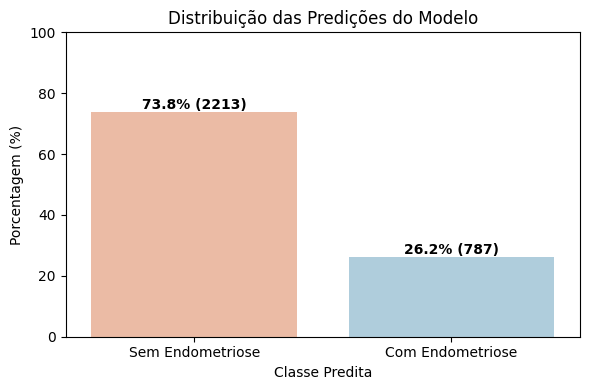

In [34]:
# Converter os resultados para um DataFrame
df_pred_visu_model = pd.DataFrame(pred_nominal, columns=["Predição"])

# Contar as ocorrências
counts = df_pred_visu_model["Predição"].value_counts(normalize=True) * 100  # porcentagem
absolute_counts = df_pred_visu_model["Predição"].value_counts()

# Ordenar as classes: Sem -> Com
classes = ["Sem Endometriose", "Com Endometriose"]
counts = counts.reindex(classes)
absolute_counts = absolute_counts.reindex(classes)

# Plotar
div_palette = sns.color_palette("RdBu", 2)
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette=div_palette)

# Adicionar os rótulos nas barras
for i, (pct, abs_val) in enumerate(zip(counts.values, absolute_counts.values)):
    plt.text(i, pct + 1, f'{pct:.1f}% ({abs_val})', ha='center', fontweight='bold')

# Configurações do gráfico
plt.title("Distribuição das Predições do Modelo")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Classe Predita")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**Interpretação do gráfico**

Em resumo, o modelo previu que:
- Aproximadamente 73.8% dos casos (2213 instâncias) não teriam endometriose.
- Aproximadamente 26.2% dos casos (787 instâncias) teriam endometriose.

### Interpretação dos resultados do modelo por meio da Matriz de Confusão

Tive um erro para realizar a matrix, após alguns estudos, tive que realizar uma modificação no tipo da variável "pred_nominal", no caso, será necessário converter o valor para "int".

Código:
pred_nominal.astype(int)

In [35]:
pred_nominal = (pred_model >= 0.5).astype(int)

In [36]:
cfm = confusion_matrix(y_test, pred_nominal)
cfm

array([[1446,  343],
       [ 767,  444]])

In [37]:
# Verificando a matriz
tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]
print('Confusion Matrix: \n', cfm, '\n')

# Valores da matriz
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

Confusion Matrix: 
 [[1446  343]
 [ 767  444]] 

True Negative: 1446
False Positive: 343
False Negative: 767
True Positive: 444


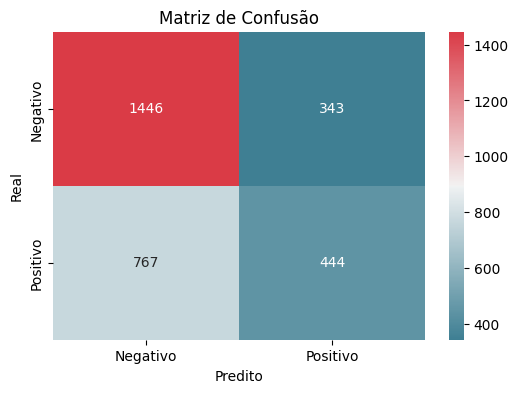

In [38]:
# Visualizando a matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap=cmap, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Interpretando a Matriz

- TN (1446): O modelo acertou ao prever que não havia endometriose.
- FP (343): O modelo errou, dizendo que havia endometriose, mas não havia.
- FN (767): O modelo errou gravemente — não detectou casos reais de endometriose. Isso é crítico em medicina!
- TP (444): O modelo acertou ao identificar corretamente a endometriose.

In [39]:
# Métricas de avaliação da matriz de confusão

balanced_accuracy = balanced_accuracy_score(y_test, pred_nominal)
accuracy = accuracy_score(y_test, pred_nominal)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade,)

Balanced accuracy: 
 0.5874559596469664 

Accuracy: 
 0.63 

Sensitivity: 
 0.3666391412056152 

Especificidade: 
 0.8082727780883175


**Interpretação das métricas de resultado**

- Acurácia Balanceada (Balanced Accuracy): **58.7%**

Esta métrica é a mais importante neste contexto, porque, dá o mesmo peso para o desempenho em ambas as classes independentemente do seu tamanho, garantindo que o modelo seja capaz de prever ambas as classes razoavelmente bem, e não apenas a classe "majoritária", ou predominante. Como no nosso modelo a sensitividade e especificidade foram desbalenceadas entre si, portanto, a melhor acurácia a ser considerada é a Acurácia Balanceada.

- A Acurácia (Accuracy): **63%**

significa que 63% de todas as previsões feitas pelo modelo estavam corretas. Em outras palavras, de cada 100 casos que o modelo tentou classificar seja como "Com Endometriose" ou "Sem Endometriose", ele acertou 63.

- Sensibilidade (classe "Com Endometriose"): **36.6%**

Isso significa que o modelo está identificando corretamente apenas 36.6% dos casos reais de endometriose.

- Especificidade (classe "Sem Endometriose"): **80.8%**

Isso indica que o modelo está indo bem em identificar corretamente os casos em que a endometriose não está presente.

#### Visualizando os sintomas preditos pelo modelo

<ipython-input-40-672d305fb702>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='coef', y='Symptom', data=df_symptoms, palette=div_palette) # 'Oranges_d' para gradiente escuro
<ipython-input-40-672d305fb702>:17: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax = sns.barplot(x='coef', y='Symptom', data=df_symptoms, palette=div_palette) # 'Oranges_d' para gradiente escuro


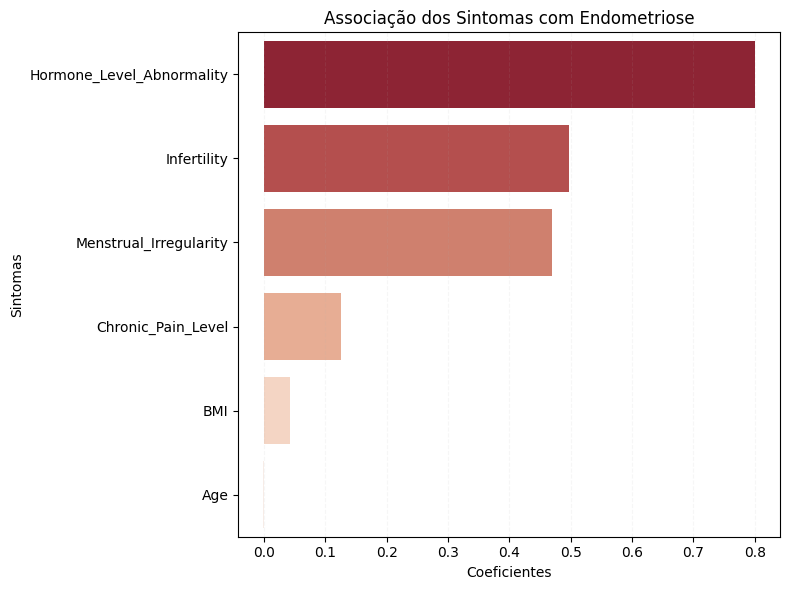

In [40]:
# Dados dos coeficientes extraídos da imagem
data = {
    'Symptom': ['Intercept', 'Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Hormone_Level_Abnormality', 'Infertility', 'BMI'],
    'coef': [-2.8798, -0.0020, 0.4688, 0.1257, 0.8009, 0.4964, 0.0421]
}
df = pd.DataFrame(data)

# Excluir o 'Intercept'
df_symptoms = df[df['Symptom'] != 'Intercept'].copy()

# Ordenar os sintomas pelos coeficientes para o gradiente de cor, do maior para o menor
df_symptoms = df_symptoms.sort_values(by='coef', ascending=False)

# Criar o gráfico usando seaborn
div_palette = sns.color_palette("RdBu", 12)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='coef', y='Symptom', data=df_symptoms, palette=div_palette) # 'Oranges_d' para gradiente escuro

plt.xlabel('Coeficientes')
plt.ylabel('Sintomas')
plt.title('Associação dos Sintomas com Endometriose')
plt.grid(axis='x', linestyle='--', alpha=0.1)

plt.tight_layout()
plt.show()

Interpretação dos resultados da visualização acima estará contido na sessão "conclusão e Recomendações" do projeto.

## Conclusão e Recomendações

### Conclusão

Análise Exploratória
- Nítidamente podemos observar a priori que as mulheres que tem uma menstruação irregular, nível hormonal anormal, dor crônica e infertilidade tem importância no diagnótico de Endometriose.
- Por mais que a população de mulheres neste conjunto de dados que tem endometriose é "minoria" em uma boa parte das que não tem, portanto, os sintomas como menstruação irregular, nível hormonal anormal, dor crônica se mostram muito fortes em torno do tamanho da população.
- Podemos concluir pela análise exploratporia que, as mulheres que tem endometriose, em suma, tem as suas dores mais intensas que se aproxima do conjunto total de mulheres que não tem endometriose, isso nos reflete que a endometriose tem picos de sintomas elevadíssimos em suas portadoras.

Modelo preditivo:
- Estatísticamente todas as variáveis do conjunto de dados, fora "Age" (Idade), são significativas para a descoberta do diagnóstico.
- Neste caso, adotamos a acurácia balanceada para explicar o poder classificatório de diagnóstico dos sintomas do modelo, ou seja, o modelo está classificando corretamente cerca de 58.7% das instâncias, levando em consideração o desempenho em todas as classes.
- Aproximadamente 73.8% dos casos (2213 instâncias) não teriam endometriose. Importante: informações sobre esse resultado estará na sessão de recomendações.
- Aproximadamente 26.2% dos casos (787 instâncias) teriam endometriose.
- O gráfico "Associação dos Sintomas com Endometriose" mostra a força da relação entre diferentes variáveis (como sintomas e características) e a presença de endometriose.

Os principais insights da visualização são:
- Hormone_Level_Abnormality (anormalidade do nível hormonal):
 **80%** tem a associação mais forte com endometriose, indicando que desequilíbrios hormonais são um fator muito relevante.
- Infertility (dificuldade para engravidar): **49,6%** apresenta uma associação significativa, sugerindo que esse problema está fortemente ligado à doença.
- Menstrual_Irregularity (irregularidade menstrual): **46,8%** mostra uma conexão moderada a forte, destacando outro sintoma importante.
- Chronic_Pain_Level (nível de dor crônica) **12,5%** e BMI (índice de massa corporal) **4,21%** têm associações mais fracas, indicando que eles têm menos impacto direto.
- Age (idade) mostra a menor correlação, sugerindo que a idade tem pouca influência na presença de endometriose.

### Recomendações

Dentro dos dados apresentados nesta análise, descobrimos uma assertividade muito grande nos principais sintomas que são significativos para o diagnóstico de Endometriose, de forma segura, os ginecologistas e todas as mulheres podem se atentar a esses sintomas para ajudar a identificar e posteriormente tratar a doença, entretanto, um dos motivos, ao qual, esta recomendação está sendo realizada é por um fator muito importante que descobrimos neste projeto, irei inserir o gráfico para refletirmos abaixo para ponderação.

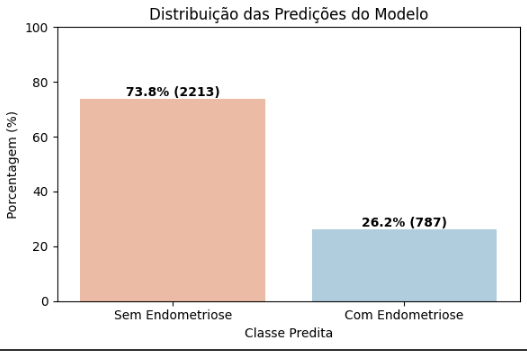

Por meio da experiência do meu familiar que me motivou para realizar este projeto, quero destacar a porcentagem do modelo de classificar a classe que não contém endometriose (73,8%) ser muito maior do que as mulheres que possuem a condição (26,2%), nestes casos, **sabemos que a endometriose é uma condição que muitas vezes é mal compreendida, subdiagnosticada e pouco discutida**, baseado neste fato, é que recomendamos:

- Todos os sintomas apresentados, principalmente com forte recorrência, devem ser motivos sim de uma consulta com um especialista na área.
- Por experiência, recomendamos uma pesquisa bem profunda para identificar um ginecologista empático e totalmente eficaz no diagnóstico da condição abordada.
- Um planejamento financeiro na medida do possível é uma recomendação para que, se preciso, uma segunda ou terceira opinião sejam levadas em questão para a decisão do tratamento.
- Não desistam do seu diagnóstico, como relatado, se você apresenta os sintomas, principalmente os apresentados aqui neste projeto e após uma ou duas consultas, você não for "dignosticado(a)" não desista, como a condição é "subdiagnosticada", a batalha para encontrar um ginecologista apto é um pouco desafiador, mas, afirmamos que vocês saberão quando encontrarem, que,  ele(a) irá ser o instrumento que vocês necessitam para o início da cura.